In [2]:
# Importing libraries and packages as needed
#------------------------------

import sys,os
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt 

%matplotlib inline

#IMporting data from the cloud using URL
#File saved on AWS S3 
#------------------------------
d_crime=pd.read_csv("https://s3-ap-southeast-1.amazonaws.com/analyticsclass/SFPD_Incidents_-_from_1_January_2003.csv")
#Initial trial using file on local machine
##d_crime=pd.read_csv("E:\Downloads\SFPD_Incidents_-_from_1_January_2003.csv")

print d_crime.shape
d_crime.head(5)
#Display top 5 files. Default value is 4
#------------------------------

(1833282, 13)


,IncidntNum,Category,Descript,DayOfWeek,Date,Time,PdDistrict,Resolution,Address,X,Y,Location,PdId
0,150932038,SECONDARY CODES,DOMESTIC VIOLENCE,Saturday,10/24/2015,23:59,INGLESIDE,NONE,0 Block of CORDOVA ST,-122.436155,37.712819,"(37.7128189051559, -122.436154623588)",15093203815200
1,150932038,VANDALISM,"MALICIOUS MISCHIEF, VANDALISM OF VEHICLES",Saturday,10/24/2015,23:59,INGLESIDE,NONE,0 Block of CORDOVA ST,-122.436155,37.712819,"(37.7128189051559, -122.436154623588)",15093203828160
2,150931585,DRUG/NARCOTIC,POSSESSION OF METH-AMPHETAMINE FOR SALE,Saturday,10/24/2015,23:46,MISSION,"ARREST, BOOKED",2700 Block of FOLSOM ST,-122.414227,37.753283,"(37.7532831691873, -122.414227348919)",15093158516652
3,150931585,FORGERY/COUNTERFEITING,"IDENTIFICATION, GOVERNMENT, POSSESS, MAKE OR S...",Saturday,10/24/2015,23:46,MISSION,"ARREST, BOOKED",2700 Block of FOLSOM ST,-122.414227,37.753283,"(37.7532831691873, -122.414227348919)",15093158509166
4,150931585,DRUG/NARCOTIC,POSSESSION OF COCAINE FOR SALES,Saturday,10/24/2015,23:46,MISSION,"ARREST, BOOKED",2700 Block of FOLSOM ST,-122.414227,37.753283,"(37.7532831691873, -122.414227348919)",15093158516622


C:\Anaconda\lib\site-packages\ipykernel\__main__.py:5: FutureWarning: sort is deprecated, use sort_values(inplace=True) for for INPLACE sorting


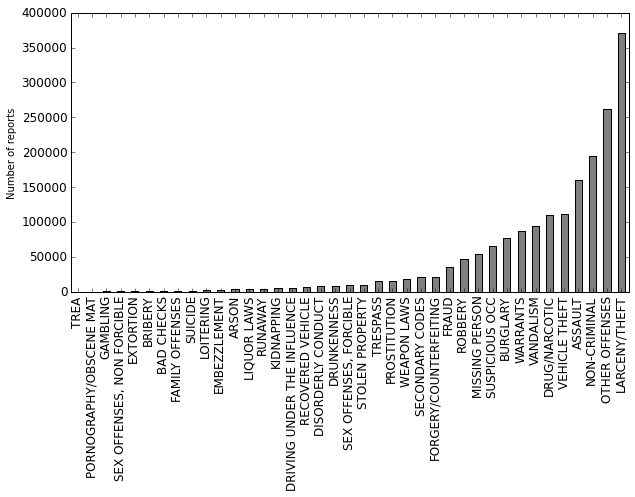

In [3]:
#Function to plot bar graph 
#------------------------------
def plotdata_bar(data,cat):
    l=data.groupby(cat).size()
    l.sort()
    #Get data and sort
    fig=plt.figure(figsize=(10,5))
    plt.yticks(fontsize=8,color='black')
    l.plot(kind='bar',fontsize=12,color='grey')
    plt.xlabel('')
    plt.ylabel('Number of reports',fontsize=10, color='black')
    plt.tick_params(axis='x', colors='black')
    #Function defines axes parameters like color tick size etc
    #------------------------------
    
plotdata_bar(d_crime,'Category')
#Call function using data and category
#------------------------------

C:\Anaconda\lib\site-packages\ipykernel\__main__.py:6: FutureWarning: sort is deprecated, use sort_values(inplace=True) for for INPLACE sorting


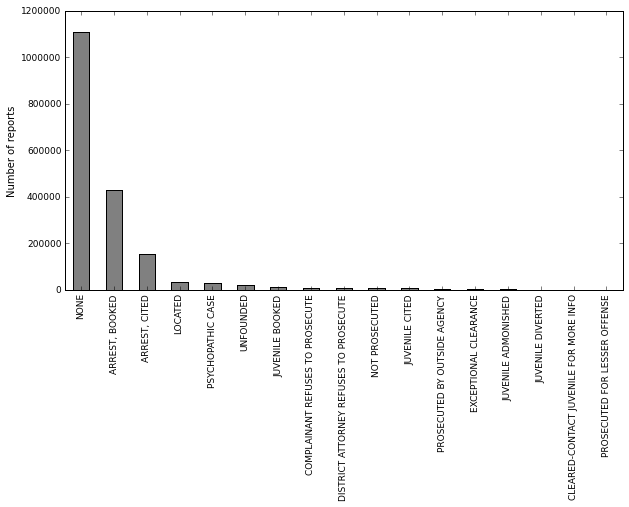

In [4]:
#Function to import and normalize data with district type.
#Function feeds input data to the heat map and scatter plot code in the subsequent lines
#------------------------------
def plotdat_def(data,cat):
    l=data.groupby(cat).size()
    l.sort(ascending=False)
    fig=plt.figure(figsize=(10,5))
    plt.yticks(fontsize=8, color='black')
    l.plot(kind='bar',fontsize=9, color='grey')
    plt.xlabel('')
    plt.ylabel('Number of reports',fontsize=10, color='black')
    plt.tick_params(axis='x', colors='black')
#Function defines axes parameters like color tick size etc
    #------------------------------
    
#Call to function with inputs as data and category
#------------------------------
plotdat_def(d_crime,'Resolution')
   



In [5]:
#Function to import and normalize data with district type.
#Function feeds input data to the heat map and scatter plot code in the subsequent lines
#------------------------------
def district_type_def(d_crime,percnt):
    
    # Group by crime type and district 
    hoods=d_crime.groupby('Descript').PdDistrict.value_counts(sort=True)
    t=hoods.unstack().fillna(0)
    #Fill missing values with 0's
    
    # Sort by hood sum
    hood_sum=t.sum(axis=0)
    hood_sum.sort(ascending=False)
    t=t[hood_sum.index]
    
    # Filter by crime per district
    crime_sum=t.sum(axis=1)
    crime_sum.sort()
    
    # Slicing teh data based on input percentile
    p=np.percentile(crime_sum,percnt)
    ix=crime_sum[crime_sum>p]
    t=t.loc[ix.index]
    return t
#Call function with data and percentile of data as parameters
#------------------------------
t=district_type_def(d_crime,98)


C:\Anaconda\lib\site-packages\pandas\core\index.py:4281: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return np.sum(name == np.asarray(self.names)) > 1
C:\Anaconda\lib\site-packages\ipykernel\__main__.py:13: FutureWarning: sort is deprecated, use sort_values(inplace=True) for for INPLACE sorting
C:\Anaconda\lib\site-packages\ipykernel\__main__.py:18: FutureWarning: sort is deprecated, use sort_values(inplace=True) for for INPLACE sorting


C:\Anaconda\lib\site-packages\matplotlib\collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


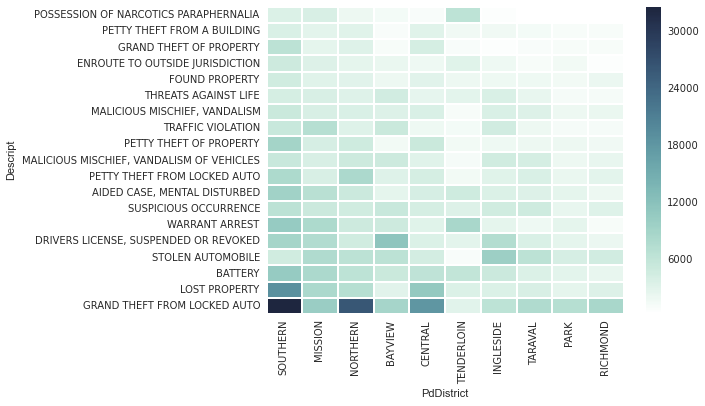

In [6]:
#Import package seaborn for plotting heatmaps and scattergrids
#------------------------------
import seaborn as sb
#Define color and line parameters
#------------------------------
cr = sb.cubehelix_palette(as_cmap=True, rot=-.3, light=1)
#Code option for cluster map or heatmaps
#------------------------------
#sb.clustermap(t,cmap=cr,linewidths=.5,standard_scale=1)
#sb.plt.show()

sb.heatmap(t, linewidths = 0.5, cmap=cr)
#------------------------------

In [7]:
#Code to check and verify data once the category has been filtered and data has been sorted for further analysis
cat=d_crime[d_crime['Category']=='DRUG/NARCOTIC']
c=cat['Descript'].value_counts()
c.sort(ascending=False)
c.head(25)


C:\Anaconda\lib\site-packages\ipykernel\__main__.py:4: FutureWarning: sort is deprecated, use sort_values(inplace=True) for for INPLACE sorting


POSSESSION OF NARCOTICS PARAPHERNALIA                20396
POSSESSION OF BASE/ROCK COCAINE                      14096
POSSESSION OF MARIJUANA                              11164
SALE OF BASE/ROCK COCAINE                             8789
POSSESSION OF METH-AMPHETAMINE                        7495
POSSESSION OF BASE/ROCK COCAINE FOR SALE              7344
POSSESSION OF MARIJUANA FOR SALES                     5590
POSSESSION OF CONTROLLED SUBSTANCE                    4237
POSSESSION OF HEROIN                                  4088
POSSESSION OF COCAINE                                 2981
SALE OF MARIJUANA                                     2876
POSSESSION OF METH-AMPHETAMINE FOR SALE               2325
POSSESSION OF CONTROLLED SUBSTANCE FOR SALE           2168
POSSESSION OF HEROIN FOR SALES                        1777
SALE OF CONTROLLED SUBSTANCE                          1558
POSSESSION OF COCAINE FOR SALES                       1298
SALE OF HEROIN                                        11

C:\Anaconda\lib\site-packages\ipykernel\__main__.py:5: FutureWarning: sort is deprecated, use sort_values(inplace=True) for for INPLACE sorting
C:\Anaconda\lib\site-packages\ipykernel\__main__.py:13: FutureWarning: sort is deprecated, use sort_values(inplace=True) for for INPLACE sorting
C:\Anaconda\lib\site-packages\ipykernel\__main__.py:18: FutureWarning: sort is deprecated, use sort_values(inplace=True) for for INPLACE sorting


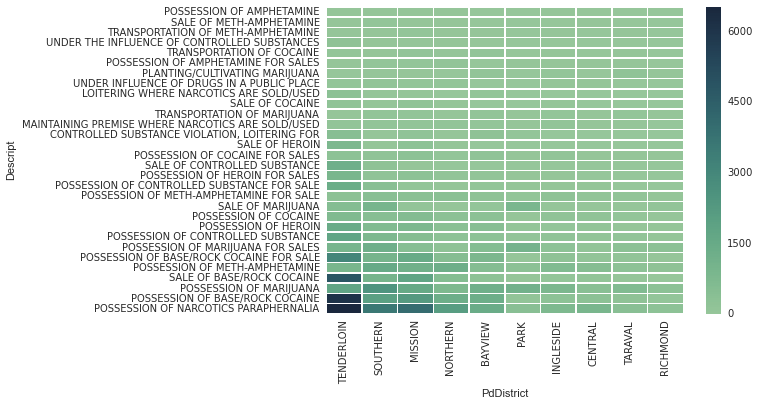

In [9]:
#DRill down further into category and fetch data based on Drug and narcotic as catergory
#------------------------------
cat_drill=d_crime[d_crime['Category']=='DRUG/NARCOTIC']
c_count=cat['Descript'].value_counts()
c_count.sort(ascending=False)
#Sort ascending
#------------------------------
t_count=district_type_def(cat,60)
#Define color and line paramters for seaborn functions clustergrid and heatmap
#------------------------------
cr = sb.cubehelix_palette(as_cmap=True, rot=-.5, light=.7)
#sb.clustermap(t_count,cmap=cr,standard_scale=1,linewidths=.4)
sb.heatmap(t_count, linewidths = 0.4, cmap=cr)



In [ ]:
#TIME SERIES ATTEMPT. UNSUCCESS DUE TO TIME CONSTRAINTS.
#------------------------------
#------------------------------


#date=pd.to_datetime(d_crime['Date'])
#print date.min()
#print date.max()
#t_delta=(date-date.min()).astype('timedelta64[D]')
#d_crime['days']=t_delta
#d_crime.head(1)
c#at=d_crime[d_crime['Category']=='DRUG/NARCOTIC']

# Bining by 30 day window
#cat['Month']=np.floor(cat['days']/30) 
# Default
#district='All'

#def timeseries(dat,per):
  #  ''' Category grouped by month '''
    
    # Group by crime type and district 
   # cat_per_time=dat.groupby('Month').Descript.value_counts(sort=True)
   # t=cat_per_time.unstack().fillna(0)
        
    # Filter by crime per district
   # crime_sum=t.sum(axis=0)
   # crime_sum.sort()
    
    # Large number, so let's slice the data.
  #  p=np.percentile(crime_sum,per)
  #  ix=crime_sum[crime_sum>p]
   # t=t[ix.index]
  #  return t
    
#t_all=timeseries(cat,0)



C:\Anaconda\lib\site-packages\ipykernel\__main__.py:5: FutureWarning: sort is deprecated, use sort_values(inplace=True) for for INPLACE sorting


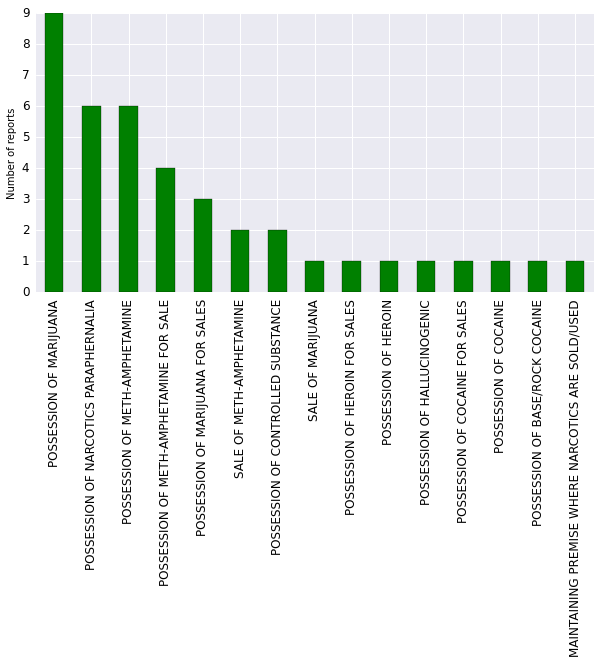

In [10]:
#Function to plot bar graph using drug instance description
#------------------------------
def plotdat_desc(data,cat):
    l=data.groupby(cat).size()
    l.sort(ascending=False)
    #Sort descending
    fig=plt.figure(figsize=(10,5))
    plt.yticks(fontsize=8, color='black')
    l.plot(kind='bar',fontsize=12,color='green')
    plt.xlabel('')
    plt.ylabel('Number of reports',fontsize=10, color='black')
    plt.tick_params(axis='x', colors='black')
#call to function using data and description as inputs
#------------------------------
plotdat_desc(cat.head(40),'Descript')